# VII. Excercise:

In [ ]:
import pandas as pd
import re
import numpy as np

In [ ]:
data_full = pd.read_csv("../data/corpdef.csv")

In [ ]:
data_full.columns = [re.sub("\s", "_", i) for i in data_full.columns]

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data_full)

In [ ]:
from util.downsampling_utils import *

data_train_dspl = train_downsample('Bankrupt?', data_train)

In [ ]:
data_train_dspl['Bankrupt?'].value_counts()

In [ ]:
data_train.select_dtypes(exclude="int").columns

In [ ]:
data_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

for col in data_train.columns:
    if data_train[col].dtype == np.float32:
        data_train[col] = StandardScaler().fit_transform(data_train[col])

data_train

In [ ]:
data_train['_ROA(A)_before_interest_and_%_after_tax'].dtype == "float"

In [ ]:
from sklearn.preprocessing import StandardScaler

pd.concat([pd.DataFrame(StandardScaler()
             .fit_transform(data_train.select_dtypes(exclude="int")),
             columns=data_train.select_dtypes(exclude="int").columns), data_train.select_dtypes(include="int")], axis=1,
          ignore_index=False)

In [ ]:
def preprocessing_pipeline(df: pd.DataFrame, downsample=False, target_var='Bankrupt?') -> pd.DataFrame:
    """
    Standardized pipeline to easily prepare the full data set for further analysis.
    At this point, performs OneHotEncoding of categorical variables and also a z-score standardization

    :param df: Transforemed data frame
    :param downsample: Whether the data set should be downsampled
    :param target_var: Target variable to be predicted
    :return: pd.DataFrame
    """
    df_out = df.copy()

    if downsample:
        df_out = train_downsample(target_var, df_out)

    df_out=pd.get_dummies(df_out)

    for col in df_out.columns:
        if df_out[col].dtype == "float" and col != target_var:
            data_train[col] = StandardScaler().fit_transform(data_train[[col]])

    return df_out

In [ ]:
%capture
train_processed = preprocessing_pipeline(data_train, downsample=True)
test_processed = preprocessing_pipeline(data_test)

In [176]:
train_processed

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
284,1,0.028496,0.114500,0.142936,-0.492187,-0.491603,0.024717,0.022291,0.026303,-0.015609,...,0.277856,-0.043137,0.037808,-0.492390,0.251020,0.868916,-0.021702,0.098148,1,-0.650500
1171,1,-1.173073,-1.032990,-1.136453,-1.122576,-1.122725,-0.000424,-0.001326,0.002303,-0.001651,...,-0.973810,-0.043137,0.038993,-1.122626,-0.112808,-0.353913,-0.048298,-0.021610,1,14.983850
1970,0,-0.064180,0.032893,-0.125631,-0.139464,-0.138470,0.025110,0.023784,0.023320,-0.013520,...,0.127116,-0.043137,-0.007991,-0.139643,0.109260,0.309297,-0.039379,0.029168,1,-0.565828
1024,0,0.934307,0.878106,0.999919,0.611570,0.619891,0.027411,0.035195,0.033405,0.004008,...,0.821616,-0.043137,-0.012724,0.611769,0.209262,-0.074289,-0.045836,-0.006094,1,-0.317427
4534,0,-0.330927,-0.236076,-0.234275,0.554471,0.556272,0.024794,0.021311,0.026743,-0.017793,...,-0.188787,-0.043137,0.676779,0.554526,-0.008863,-0.246204,0.015627,0.178086,1,0.328634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0,-0.969185,-0.808988,-1.015641,-1.078371,-1.078468,0.000884,-0.017935,-0.007317,-0.038682,...,-0.540710,-0.043137,0.203522,-1.078195,-0.062741,-0.279857,-0.046782,-0.011907,1,0.772159
5957,0,0.572466,0.774848,0.600109,0.243651,0.238636,0.026834,0.028356,0.027715,-0.008488,...,0.702642,-0.043137,-0.002860,0.243784,0.346497,0.482942,-0.042301,0.014090,1,-0.604105
526,1,-0.936950,-0.201101,-0.995651,-0.862408,-0.862255,0.013978,0.019249,0.020529,0.004710,...,-0.210032,-0.043137,-0.109227,-0.862415,0.018775,1.168426,0.113893,0.258915,1,-0.670375
54,1,-0.853138,-0.635782,-0.771410,-0.701242,-0.700441,0.016627,-0.001858,0.002544,-0.044796,...,-0.748215,-0.043137,-0.510043,-0.701089,-0.226304,0.686835,-0.088500,-0.883082,1,-0.632869


## 2 PCA

In [208]:
from sklearn.decomposition import PCA

pd.DataFrame(PCA(n_components=.90).fit_transform(train_processed.drop('Bankrupt?', axis=1)),
             index=train_processed.index,
             columns=[f"pc_{i+1}" for i in range()])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
284,0.529668,-0.386540,-0.539108,-0.244617,-1.337549,0.758057,0.072478,1.217722,-0.313149,0.376126,-0.193321,3.220985,0.191031,1.441068,-0.426261,0.217857
1171,-2.167336,-0.999987,-6.039245,6.753144,21.524098,-5.415278,-1.079205,-1.766172,-5.492150,-12.700125,-11.587749,-0.493441,-0.432047,-1.850149,5.477532,0.205208
1970,-0.660674,-0.541847,-1.800610,0.309543,-1.291428,0.339747,-0.269235,0.607292,-0.188641,1.715496,-1.157569,2.440721,-0.084395,-0.061560,-0.408844,0.393607
1024,-1.678101,-0.533353,-3.739113,1.023593,-1.755891,0.967321,0.050174,0.044600,0.107106,0.645624,-0.531740,-0.018106,0.130860,0.241150,0.564993,1.271374
4534,-1.941846,-0.648120,-1.675414,0.056058,-0.555833,0.344045,-0.023510,-0.059072,-0.709536,-0.763129,0.388680,-2.663073,-0.998704,-0.658772,-0.050880,-0.857714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,-1.868995,-0.641717,-0.410105,-0.039479,0.630467,-0.539823,0.202113,-0.379672,-0.640621,-0.771098,0.868996,-2.214588,-0.544008,0.101823,-2.506167,-2.129852
5957,-0.979625,-0.773923,-3.845860,0.541222,-1.989387,2.055843,0.099662,1.470444,-0.967229,1.662985,-0.968328,2.080098,-0.391771,0.356067,0.019340,0.562672
526,1.232107,-0.243215,1.136954,-0.600735,-0.846110,0.046688,-0.287484,-0.727056,1.020501,-0.766046,0.629075,2.467986,1.016489,0.843485,-0.498681,-0.135076
54,0.786704,-0.046332,1.132659,-0.377877,-0.614132,-0.170993,-0.492510,-2.648406,2.210673,-1.406669,1.019342,0.382250,1.215658,0.544347,-0.365432,-0.288531


In [251]:
def get_pca(df, target, pca_var_threshold=.90, vars_untransformed=[]):

    pca_t = PCA(n_components=pca_var_threshold).fit_transform(
        df.drop([target]+vars_untransformed, axis=1))
    pca_t = pd.DataFrame(pca_t, index=df.index, columns=[f"pc_{i+1}" for i in range(pca_t.shape[1])])

    return pca_t

In [255]:
def add_pca(df, target, pca_var_threshold=.90, vars_untransformed=[]):

    df_pca_added = df.copy()
    df_pca_added = pd.concat([get_pca(df, target, pca_var_threshold, vars_untransformed),
                              df_pca_added],
                             axis=1)
    return df_pca_added

In [256]:
def get_n_pc(df):
    return df.filter(regex="pc.*").shape[1]

In [257]:
train_processed_pca = add_pca(train_processed, "Bankrupt?")
test_processed_pca = add_pca(test_processed, "Bankrupt?", pca_var_threshold=get_n_pc(train_processed_pca))

# 3 Modelling

In [263]:
from sklearn.model_selection import train_test_split
features = [f"pc_{pc+1}" for pc in range(3)]


In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [3, 10, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search_fit = grid_search.fit(train_processed_pca[features], train_processed_pca['Bankrupt?'])



In [271]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [272]:
grid_search

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [268]:
cvres = grid_search.cv_results_

In [269]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4494330314421091 {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 3}
0.42857035170332713 {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
0.4213866536745915 {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
0.43219591182274186 {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 3}
0.41435132369550054 {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
0.4069722513729989 {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
0.4105131315897195 {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 3}
0.41413295671132483 {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_

In [285]:
grid_search.predict(train_processed_pca[features])

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [291]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(grid_search.predict(train_processed_pca[features]), train_processed_pca['Bankrupt?'])

<AxesSubplot: >

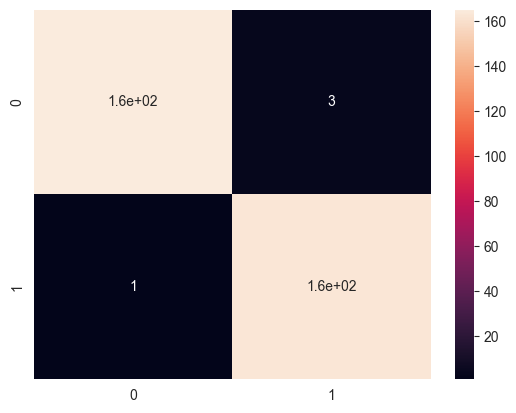

In [294]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [296]:
pred = grid_search.predict(test_processed_pca[features])

In [297]:
cfn_matrix

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)